In [1]:
import numpy as np
import pandas as pd

In [2]:
base = ('/Users/victoriaivanova/Desktop/ML/kaggle_data')
data = pd.read_csv(base + '/updated_amazon_prime_users.csv', delimiter=';')

In [5]:
data.dtypes

User ID                            int64
Name                              object
Email Address                     object
Username                          object
Date of Birth                     object
Gender                            object
Location                          object
Membership Start Date             object
Membership End Date               object
Subscription Plan                 object
Payment Information               object
Renewal Status                    object
Usage Frequency                   object
Purchase History                  object
Favorite Genres                   object
Devices Used                      object
Engagement Metrics                object
Feedback/Ratings                 float64
Customer Support Interactions      int64
dtype: object

In [3]:
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,Male,Rebeccachester,15/1/2024,14/1/2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,8/7/1978,Male,Mcphersonview,7/1/2022,6/1/2023,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,Female,Youngfort,13/4/2022,13/4/2023,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,Female,Feliciashire,24/1/2023,23/1/2024,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,Male,Port Deborah,14/2/2024,13/6/2024,Monthly,Visa,Manual,Frequent,Clothing,Drama,Smart TV,Low,3.0,1


    'User ID' можно убрать, так как оно не играет никакой роли

In [4]:
data.drop('User ID', inplace=True, axis=1)

In [5]:
data.shape

(2550, 18)

In [6]:
data.head()

,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,Male,Rebeccachester,15/1/2024,14/1/2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,Scott Allen,scott22@example.org,scott22,8/7/1978,Male,Mcphersonview,7/1/2022,6/1/2023,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,Female,Youngfort,13/4/2022,13/4/2023,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,Female,Feliciashire,24/1/2023,23/1/2024,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,Male,Port Deborah,14/2/2024,13/6/2024,Monthly,Visa,Manual,Frequent,Clothing,Drama,Smart TV,Low,3.0,1


In [7]:
data['Customer Support Interactions'].unique()

array([ 3,  7,  8,  1,  2, 10,  6,  0,  4,  9,  5])

In [8]:
data['Feedback/Ratings'].unique()

array([3.6, 3.8, 3.3, 3. , 4.4, 4. , 4.9, 4.7, 5. , 4.6, 4.2, 3.9, 4.3,
       4.8, 4.1, 4.5, 3.2, 3.1, 2.5, 3.5, 3.4, 3.7, 2. , 2.2, 2.1, 2.3,
       1.5, 2.7, 2.9, 1.4, 1.2, 1.9, 1.1, 1.8, 1.7, 2.6, 1.3, 2.8])

## Анализ данных

    В данных будем предасказывать target - Feedback/Ratings, то есть решать задачу линейной регрессии.
    Типы данных:


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           2550 non-null   object 
 1   Email Address                  2550 non-null   object 
 2   Username                       2550 non-null   object 
 3   Date of Birth                  2550 non-null   object 
 4   Gender                         2550 non-null   object 
 5   Location                       2550 non-null   object 
 6   Membership Start Date          2550 non-null   object 
 7   Membership End Date            2550 non-null   object 
 8   Subscription Plan              2550 non-null   object 
 9   Payment Information            2550 non-null   object 
 10  Renewal Status                 2550 non-null   object 
 11  Usage Frequency                2550 non-null   object 
 12  Purchase History               2550 non-null   o

In [10]:
data.isna().sum()

Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64

    Пропусков нет, значит будем сразу раюотать над категориальными признаками

    Практически все признаки являются категореальными\
    'Gender' и 'Engagement Metrics' закодируем вручную через map

In [11]:
data['Gender'].unique(), data['Engagement Metrics'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['Medium', 'Low', 'High'], dtype=object))

In [12]:
data['Gender'] = data['Gender'].map({
    'Male': 0,
    'Female': 1
})

data['Engagement Metrics'] = data['Engagement Metrics'].map({
    'High': 2,
    'Medium': 1,
    'Low': 0
})

data['Usage Frequency'] = data['Usage Frequency'].map({
    'Frequent': 2,
    'Occasional': 1,
    'Regular': 0
})

In [13]:
data['Usage Frequency'].unique()

array([0, 2, 1])

    Дату начал/конца подписки заменим на количество дней, проведеных на данной платформе

In [14]:
data['Membership End Date'] = pd.to_datetime(data['Membership End Date'], format='%d/%m/%Y')

In [15]:
data['Membership Start Date'] = pd.to_datetime(data['Membership Start Date'], format='%d/%m/%Y', errors='coerce')

In [16]:
data[data['Membership Start Date'].isna()]

,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
82,Thomas Davis,brendasmith@example.com,brendasmith,1/12/1938,1,Carsonhaven,NaT,2024-02-28,Monthly,Visa,Manual,0,Electronics,Romance,Smartphone,0,2.5,5


In [17]:
data = data.dropna(subset=['Membership Start Date'])

In [18]:
data[['Membership Start Date','Membership End Date']]

,Membership Start Date,Membership End Date
0,2024-01-15,2025-01-14
1,2022-01-07,2023-01-06
2,2022-04-13,2023-04-13
3,2023-01-24,2024-01-23
4,2024-02-14,2024-06-13
...,...,...
2545,2024-09-12,2025-10-12
2546,2022-08-22,2024-04-10
2547,2023-05-20,2024-01-24
2548,2022-05-17,2026-08-08


In [19]:
data.loc[:, 'Usage duration'] = (data['Membership End Date'] - data['Membership Start Date']).dt.days

In [20]:
data = data.drop(['Membership End Date', 'Membership Start Date'], axis=1)

In [21]:
data.head()

,Name,Email Address,Username,Date of Birth,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Usage duration
0,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,0,Rebeccachester,Annual,Mastercard,Manual,0,Electronics,Documentary,Smart TV,1,3.6,3,365
1,Scott Allen,scott22@example.org,scott22,8/7/1978,0,Mcphersonview,Monthly,Visa,Manual,0,Electronics,Horror,Smartphone,1,3.8,7,364
2,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,1,Youngfort,Monthly,Mastercard,Manual,0,Books,Comedy,Smart TV,0,3.3,8,365
3,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,1,Feliciashire,Monthly,Amex,Auto-renew,0,Electronics,Documentary,Smart TV,2,3.3,7,364
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,0,Port Deborah,Monthly,Visa,Manual,2,Clothing,Drama,Smart TV,0,3.0,1,120


    Дату рождения можно заменить на возраст пользователя

In [22]:
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'], format='%d/%m/%Y', errors='coerce')

In [23]:
data['Date of Birth'].isna().sum()

0

In [24]:
today = pd.Timestamp.today().normalize()

In [25]:
data.loc[:, 'Age'] = (today - data['Date of Birth']).dt.days // 365

In [26]:
data = data.drop('Date of Birth', axis=1)

In [27]:
data.head()

,Name,Email Address,Username,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Usage duration,Age
0,Ronald Murphy,williamholland@example.com,williamholland,0,Rebeccachester,Annual,Mastercard,Manual,0,Electronics,Documentary,Smart TV,1,3.6,3,365,71
1,Scott Allen,scott22@example.org,scott22,0,Mcphersonview,Monthly,Visa,Manual,0,Electronics,Horror,Smartphone,1,3.8,7,364,46
2,Jonathan Parrish,brooke16@example.org,brooke16,1,Youngfort,Monthly,Mastercard,Manual,0,Books,Comedy,Smart TV,0,3.3,8,365,30
3,Megan Williams,elizabeth31@example.net,elizabeth31,1,Feliciashire,Monthly,Amex,Auto-renew,0,Electronics,Documentary,Smart TV,2,3.3,7,364,60
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,0,Port Deborah,Monthly,Visa,Manual,2,Clothing,Drama,Smart TV,0,3.0,1,120,63


In [28]:
data.select_dtypes(include='object').keys()

Index(['Name', 'Email Address', 'Username', 'Location', 'Subscription Plan',
       'Payment Information', 'Renewal Status', 'Purchase History',
       'Favorite Genres', 'Devices Used'],
      dtype='object')

In [29]:
data['Subscription Plan'].unique()

array(['Annual', 'Monthly'], dtype=object)

In [30]:
data['Subscription Plan'] = data['Subscription Plan'].map({
    'Annual': 1,
    'Monthly': 0
})

In [31]:
data['Payment Information'].unique()

array(['Mastercard', 'Visa', 'Amex'], dtype=object)

In [32]:
data['Payment Information'] = data['Payment Information'].map({
    'Mastercard': 2,
    'Visa': 1,
    'Amex': 0
})

In [33]:
data['Renewal Status'] = data['Renewal Status'].map({
    'Manual': 1,
    'Auto-renew': 0
})

In [34]:
data.head()

,Name,Email Address,Username,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Usage duration,Age
0,Ronald Murphy,williamholland@example.com,williamholland,0,Rebeccachester,1,2,1,0,Electronics,Documentary,Smart TV,1,3.6,3,365,71
1,Scott Allen,scott22@example.org,scott22,0,Mcphersonview,0,1,1,0,Electronics,Horror,Smartphone,1,3.8,7,364,46
2,Jonathan Parrish,brooke16@example.org,brooke16,1,Youngfort,0,2,1,0,Books,Comedy,Smart TV,0,3.3,8,365,30
3,Megan Williams,elizabeth31@example.net,elizabeth31,1,Feliciashire,0,0,0,0,Electronics,Documentary,Smart TV,2,3.3,7,364,60
4,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,0,Port Deborah,0,1,1,2,Clothing,Drama,Smart TV,0,3.0,1,120,63


In [35]:
data['Favorite Genres'].unique(), data['Devices Used'].unique()

(array(['Documentary', 'Horror', 'Comedy', 'Drama', 'Action', 'Sci-Fi',
        'Romance'], dtype=object),
 array(['Smart TV', 'Smartphone', 'Tablet', 'Laptop'], dtype=object))

    Для 'Favorite Genres' и 'Favorite Genres' используем OHE
    

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
features = ['Favorite Genres','Devices Used', 'Purchase History']

In [38]:
cat_features = data[features]

In [39]:
enc = OneHotEncoder(sparse_output=False)

In [40]:
enc.fit(cat_features)

OneHotEncoder(sparse_output=False)

In [41]:
encoded_features = enc.transform(cat_features)

In [42]:
categories = enc.categories_

In [43]:
columns = []
for i, cat in enumerate(categories):
    col = features[i]
    for c in cat:
        columns.append(f'{col}={c}')


In [44]:
df_enc = pd.DataFrame(encoded_features, columns=columns, index=data.index)

In [45]:
data = pd.concat([data, df_enc], axis=1)

In [46]:
data = data.drop(features, axis=1)

In [47]:
data.select_dtypes(include='object').keys()

Index(['Name', 'Email Address', 'Username', 'Location'], dtype='object')

    'Name', 'Email Address', 'Username' скорее всего никак не будут влиять на наши предсказания, поэтому уберем их

In [48]:
names = ['Name', 'Email Address', 'Username']

In [49]:
data = data.drop(names, axis=1)

In [50]:
len(data['Location'].unique())

2305

In [51]:
data.shape

(2549, 27)

## Графики

In [52]:
import matplotlib.pyplot as plt

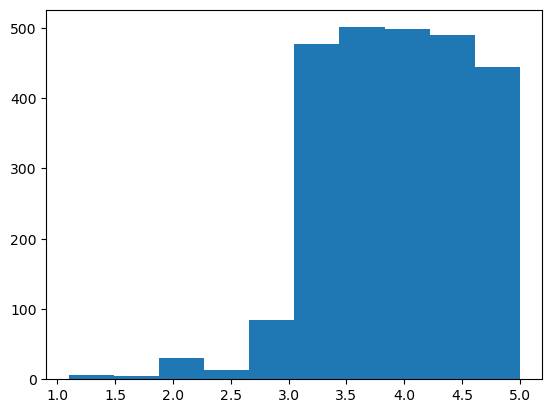

In [54]:
plt.hist(data['Feedback/Ratings']);

## Модель


    Сначала обучим модель без 'Location', затем используем для него TargetEncoding

In [55]:
data.head()

,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Usage duration,...,Favorite Genres=Sci-Fi,Devices Used=Laptop,Devices Used=Smart TV,Devices Used=Smartphone,Devices Used=Tablet,Purchase History=Books,Purchase History=Clothing,Purchase History=Electronics,Purchase History=Movies,Purchase History=Music
0,0,Rebeccachester,1,2,1,0,1,3.6,3,365,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,Mcphersonview,0,1,1,0,1,3.8,7,364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,Youngfort,0,2,1,0,0,3.3,8,365,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,Feliciashire,0,0,0,0,2,3.3,7,364,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,Port Deborah,0,1,1,2,0,3.0,1,120,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [59]:
X, y = (
    data.drop(['Location', 'Feedback/Ratings'], axis=1),
    data['Feedback/Ratings']
)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [63]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.40840029662449007


In [64]:
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.4074000577454867


In [65]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.5010680885985384
